In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import numpy as np
from tensorflow import keras
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
# K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
from keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
import os
import zipfile

local_zip = '/content/drive/My Drive/Data sets and Links/CatsDogs.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()
drive.flush_and_unmount()

In [19]:

train_dir= "CatsDogs/train"
test_dir= "CatsDogs/test1"
train_fileN= os.listdir(train_dir)
test_fileN=os.listdir(test_dir)
train_size= len([name for name in train_fileN])
test_size = len([name for name in test_fileN])
print (train_size)
print(test_size)


trainLabels=[]
for fileN in train_fileN:
    trainLabels.append(fileN.split('.')[0])
testLabels=[]
for fileN in test_fileN:
    testLabels.append(fileN.split('.')[0])
print(len(trainLabels),len(testLabels))

trainDf= pd.DataFrame({
    'id':train_fileN,
    'labels':trainLabels
}
    )
train_df, dev_df = train_test_split(trainDf,shuffle=True, test_size=0.10)
train_datagen = image.ImageDataGenerator(    
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255.,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)
dev_datagen  = image.ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_dataframe(
train_df, 
train_dir, 
x_col='id',
y_col='labels',
target_size=(128, 128),
class_mode='binary',
batch_size=20
)
dev_generator = dev_datagen.flow_from_dataframe(
dev_df, 
train_dir, 
x_col='id',
y_col='labels',
target_size=(128, 128),
class_mode='binary',
batch_size=20
)
        



25000
12500
25000 12500
Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
total_train = train_df.shape[0]
total_validate = dev_df.shape[0]
print(total_train, total_validate)

22500 2500


In [35]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3),name = 'conv0',activation="relu",input_shape=(128, 128, 3)),
    keras.layers.BatchNormalization(name = 'bn0'),
    keras.layers.MaxPooling2D((2, 2), name='max_pool'),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), name = 'conv1',activation="relu"),
    keras.layers.BatchNormalization( name = 'bn01'),
    keras.layers.MaxPooling2D((2, 2), name='max_pool1'),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), name = 'conv3',activation="relu"),
    keras.layers.BatchNormalization(name = 'bn012'),
    keras.layers.MaxPooling2D((2, 2), name='max_pool12'),
    keras.layers.Dropout(0.3),
  

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu', name='fc1'),
    keras.layers.BatchNormalization( name = 'bn4'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid', name='fc')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 126, 126, 32)      896       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 126, 126, 32)      128       
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 61, 61, 64)        18496     
_________________________________________________________________
bn01 (BatchNormalization)    (None, 61, 61, 64)        256       
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 30, 30, 64)       

In [36]:
model.compile(keras.optimizers.RMSprop(),"binary_crossentropy",metrics=["accuracy"])

**CallBacks**

In [22]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [23]:
earlystop = EarlyStopping(patience=10)

In [24]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [25]:
callbacks = [ learning_rate_reduction]

In [37]:

#fit
VALID_FRACTION = 0.2
batch_size = 20
EPOCHS = 10
history = model.fit(train_generator,
    validation_data=dev_generator,
  validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    epochs=EPOCHS)
#evaluate

Epoch 1/10
1125/1125 [==============================] - 176s 157ms/step - loss: 0.6918 - accuracy: 0.6114 - val_loss: 0.5666 - val_accuracy: 0.7036
Epoch 2/10
1125/1125 [==============================] - 175s 156ms/step - loss: 0.5715 - accuracy: 0.7009 - val_loss: 0.5414 - val_accuracy: 0.7232
Epoch 3/10
1125/1125 [==============================] - 178s 158ms/step - loss: 0.5205 - accuracy: 0.7400 - val_loss: 0.5156 - val_accuracy: 0.7560
Epoch 4/10
1125/1125 [==============================] - 179s 159ms/step - loss: 0.4907 - accuracy: 0.7668 - val_loss: 0.4998 - val_accuracy: 0.7424
Epoch 5/10
1125/1125 [==============================] - 179s 159ms/step - loss: 0.4670 - accuracy: 0.7804 - val_loss: 0.4770 - val_accuracy: 0.7760
Epoch 6/10
1125/1125 [==============================] - 178s 159ms/step - loss: 0.4455 - accuracy: 0.7960 - val_loss: 0.3715 - val_accuracy: 0.8308
Epoch 7/10
1125/1125 [==============================] - 176s 157ms/step - loss: 0.4333 - accuracy: 0.8008 - val_

Text(0.5, 1.0, 'Training and validation loss')

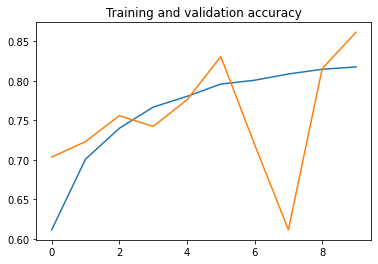

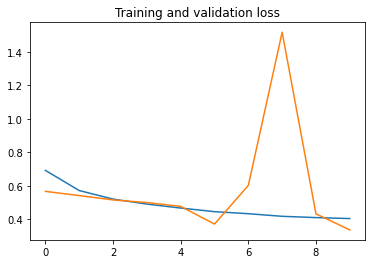

In [39]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
d.append([acc[-1],val_acc[-1],loss[-1],val_loss[-1]])
epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
print(np.mean(val_acc))

0.7380400002002716


In [34]:
model.save('10Epoch85VAcc.h5')

In [ ]:
print(keras.models.load_model('2EpochGood'))

In [40]:
d


[[0.8261333107948303,
  0.864799976348877,
  0.3878205716609955,
  0.3228969871997833],
 [0.8176888823509216,
  0.8615999817848206,
  0.40434929728507996,
  0.336611270904541]]

In [41]:
test_filenames = os.listdir("CatsDogs/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [47]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "CatsDogs/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(128,128),
    batch_size=20,
    shuffle=False
)

Found 12500 validated image filenames.


In [46]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

Instructions for updating:
Please use Model.predict, which supports generators.


In [61]:
type(predict)

numpy.ndarray

In [64]:
predicted_val = [int(round(p[0])) for p in predict]


In [66]:
test_df['Result']=predicted_val 

In [69]:
test_df.to_csv("submission.csv", index=False)

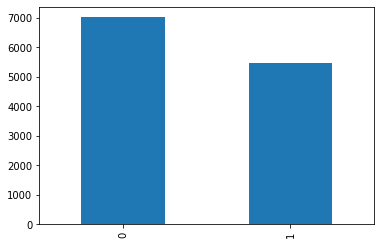

In [78]:
# 0 - Cat
#1-Dog
test_df['Result'].value_counts().plot.bar()


In [77]:
test_df['Result'].value_counts()

0    7017
1    5483
Name: Result, dtype: int64

In [ ]:
#dogs are wrongly classified as cats
#add features
#shuffle Training and dev sets